In [28]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_bar, labs

In [29]:
file_path = "./data/multi_asset_etf_data.xlsx"

In [30]:
excess_returns_df = pd.read_excel(file_path, 
                                  sheet_name="excess returns", 
                                  parse_dates=["Date"],
                                  index_col="Date") # monthly excess returns

excess_returns_df = excess_returns_df.drop(columns=["QAI"]) #resolve issue with data

In [31]:
excess_returns_df

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
Date,,,,,,,,,,
2011-02-28,0.007027,0.042120,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.035147,0.007618
2011-03-31,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.000448,0.012231
2011-04-30,0.048760,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.028917,0.023735
2011-05-31,-0.012945,-0.051124,-0.028800,-0.021461,0.001933,0.025654,0.010733,-0.040965,-0.010615,0.003259
2011-06-30,0.000230,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.016542,0.007876
...,...,...,...,...,...,...,...,...,...,...
2025-01-31,-0.002198,0.024463,0.018388,0.044877,0.010472,0.003033,0.015780,0.064862,0.023724,0.010570
2025-02-28,0.011376,-0.001250,0.008855,0.026915,0.007087,0.025382,0.035246,-0.042722,-0.015310,0.018957
2025-03-31,0.007510,0.019885,0.008497,-0.001004,-0.013701,0.000577,-0.026225,-0.063669,-0.058562,0.003954


# 1. Summary Statistics

In [32]:
mean_m = excess_returns_df.mean()
vol_m = excess_returns_df.std(ddof=1)

In [33]:
summary = pd.DataFrame({
    "Annualized Mean": mean_m * 12,
    "Annualized Vol": vol_m * np.sqrt(12),
    "Annualized Sharpe": (mean_m / vol_m) * np.sqrt(12),
    "Monthly Mean": mean_m,
    "Monthly Vol": vol_m,
    "Monthly Sharpe": (mean_m / vol_m),
    "Skewness" : excess_returns_df.skew(),
    "Kurtosis": excess_returns_df.kurtosis()
})

In [34]:
summary = summary.sort_values("Annualized Sharpe", ascending=False)
summary = summary.round(4)

In [35]:
summary

,Annualized Mean,Annualized Vol,Annualized Sharpe,Monthly Mean,Monthly Vol,Monthly Sharpe,Skewness,Kurtosis
SPY,0.1281,0.1428,0.8971,0.0107,0.0412,0.2590,-0.3794,0.7571
HYG,0.0414,0.0759,0.5449,0.0034,0.0219,0.1573,-0.4685,4.4528
IYR,0.0749,0.1687,0.4441,0.0062,0.0487,0.1282,-0.4443,1.4161
PSP,0.0926,0.2134,0.4338,0.0077,0.0616,0.1252,-0.6125,2.5018
EFA,0.0618,0.1509,0.4094,0.0051,0.0436,0.1182,-0.2735,0.9471
TIP,0.0205,0.0511,0.4011,0.0017,0.0148,0.1158,-0.6477,2.5689
IEF,0.0164,0.0634,0.2586,0.0014,0.0183,0.0746,-0.0472,0.0700
EEM,0.0293,0.1762,0.1665,0.0024,0.0509,0.0481,-0.0987,1.4232
DBC,-0.0053,0.1666,-0.0318,-0.0004,0.0481,-0.0092,-0.5090,0.7574
BWX,-0.0077,0.0828,-0.0932,-0.0006,0.0239,-0.0269,-0.1581,0.6699


####
 From the results above, we find that the asset with the best Sharpe ratio is SPY (0.8971) and the asset with the worst Sharpe is BWX (-0.0932)

# 2. Descriptive Analysis

In [36]:
corr = excess_returns_df.corr()
corr = corr.round(4)

In [37]:
corr #Correlation Matrix

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
BWX,1.0000,0.1911,0.6217,0.6028,0.6026,0.5809,0.5526,0.5267,0.4400,0.6752
DBC,0.1911,1.0000,0.5117,0.5009,0.4619,-0.3002,0.2805,0.4533,0.4322,0.1090
EEM,0.6217,0.5117,1.0000,0.8199,0.6912,0.0267,0.5841,0.7501,0.6878,0.3788
EFA,0.6028,0.5009,0.8199,1.0000,0.7872,0.0426,0.6993,0.8953,0.8459,0.3948
HYG,0.6026,0.4619,0.6912,0.7872,1.0000,0.1873,0.7394,0.8122,0.7935,0.5386
IEF,0.5809,-0.3002,0.0267,0.0426,0.1873,1.0000,0.3165,0.0224,0.0008,0.7541
IYR,0.5526,0.2805,0.5841,0.6993,0.7394,0.3165,1.0000,0.7498,0.7547,0.5987
PSP,0.5267,0.4533,0.7501,0.8953,0.8122,0.0224,0.7498,1.0000,0.8917,0.4080
SPY,0.4400,0.4322,0.6878,0.8459,0.7935,0.0008,0.7547,0.8917,1.0000,0.3816
TIP,0.6752,0.1090,0.3788,0.3948,0.5386,0.7541,0.5987,0.4080,0.3816,1.0000


In [38]:
corr_pairs = corr.stack()
corr_pairs = corr_pairs[corr_pairs != 1]
max_pair, max_val = corr_pairs.idxmax(), corr_pairs.max()
min_pair, min_val = corr_pairs.idxmin(), corr_pairs.min()

In [39]:
print("Highest correlation:", max_pair, max_val)
print("Lowest correlation:", min_pair, min_val)

Highest correlation: ('EFA', 'PSP') 0.8953
Lowest correlation: ('DBC', 'IEF') -0.3002


In [40]:
annualized_mean = excess_returns_df.mean() * 12

In [41]:
# IEF: US Treasury 7-10y ETF
# BWX: International Treasury ETF

compare_df = pd.DataFrame({
    "Annualized Mean": annualized_mean[["TIP", "IEF", "BWX"]]
})
compare_df = compare_df.round(4)

In [42]:
compare_df

,Annualized Mean
TIP,0.0205
IEF,0.0164
BWX,-0.0077


##### 
 In terms of annualized mean, we found that TIPS outperformed both domestic bonds (IEF) and foreign bonds (BWX). 

# 3. The MV frontier

     Tangency Portfolio Weights
BWX                   -0.850643
DBC                   -0.071623
EEM                    0.026437
EFA                    0.068682
HYG                    0.290614
IEF                    0.881186
IYR                   -0.246582
PSP                   -0.332995
SPY                    1.059632
TIP                    0.175293


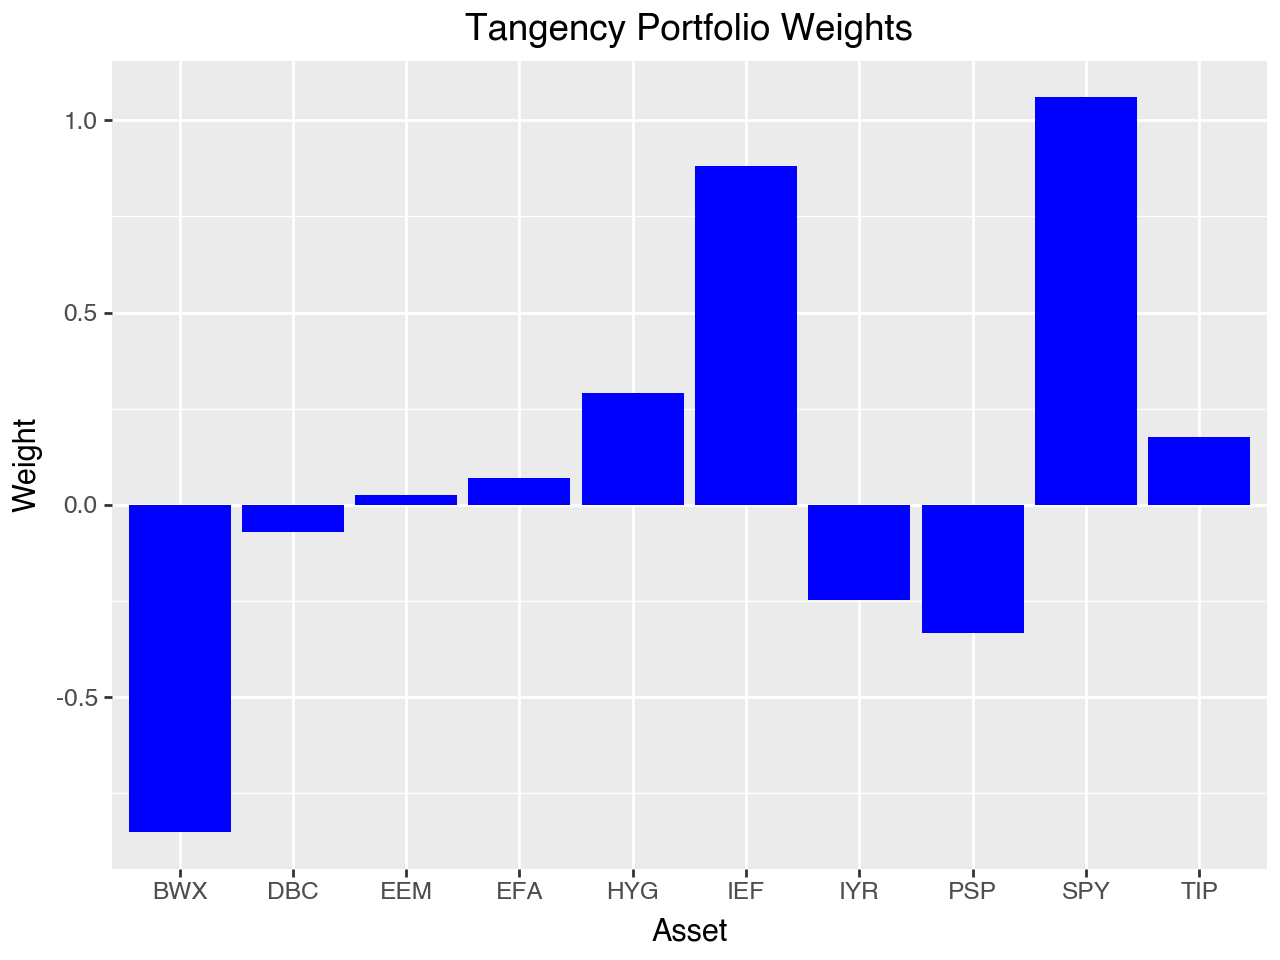

In [43]:
#Tangency Portfolio - w^tan needs to sum to 1

cov_matrix = excess_returns_df.cov() 
cov_vals = cov_matrix.values
mean_vals = mean_m.values

w_unnormalized = np.linalg.inv(cov_vals) @ mean_vals
w_tan = w_unnormalized / np.sum(w_unnormalized)

w_tan_df = pd.DataFrame({
    "Tangency Portfolio Weights": w_tan
}, index=excess_returns_df.columns)
print(w_tan_df)

ggplot(w_tan_df, aes(x=w_tan_df.index, y="Tangency Portfolio Weights")) + \
    geom_bar(stat="identity", fill = "blue") + \
    labs(title="Tangency Portfolio Weights", x="Asset", y="Weight")


In [44]:
#Sharpe Ratio vs Tangency Weights
weights_vs_sharpe = pd.DataFrame({
    "Tangency Weights": w_tan,
    "Annualized Sharpe": summary["Annualized Sharpe"]
}, index=excess_returns_df.columns)

weights_vs_sharpe = weights_vs_sharpe.sort_values("Annualized Sharpe", ascending=False)

weights_vs_sharpe

,Tangency Weights,Annualized Sharpe
SPY,1.059632,0.8971
HYG,0.290614,0.5449
IYR,-0.246582,0.4441
PSP,-0.332995,0.4338
EFA,0.068682,0.4094
TIP,0.175293,0.4011
IEF,0.881186,0.2586
EEM,0.026437,0.1665
DBC,-0.071623,-0.0318
BWX,-0.850643,-0.0932


#### 
As seen above, the ranking of tangency weights does not quite align with the ranking of the Sharpe ratios for all of our assets. Above we notice that SPY has the highest tangency weights and highest Sharpe and DWX has the lowest tangency weights and smallest Sharpe. That being said, for the assets in between these two, there is no clear pattern. 

In [45]:
#Mean, volatility, and Sharpe ratio for Tangency Portfolio Weights
mean_tan = w_tan @ mean_vals
vol_tan = np.sqrt(w_tan @ cov_matrix @ w_tan)
sharpe_tan = (mean_tan / vol_tan)
print("Performance of Tangency Portfolio:")
print("Annualized Mean:", (mean_tan * 12).round(4))
print("Annualized Vol:", (vol_tan * np.sqrt(12)).round(4))
print("Annualized Sharpe:", (sharpe_tan * np.sqrt(12)).round(4))


Performance of Tangency Portfolio:
Annualized Mean: 0.1285
Annualized Vol: 0.0875
Annualized Sharpe: 1.4692


# 4. TIPS

     Tangency Portfolio Weights After Dropping TIPS
BWX                                       -0.879292
DBC                                       -0.063742
EEM                                        0.032493
EFA                                        0.060153
HYG                                        0.316300
IEF                                        1.019957
IYR                                       -0.247445
PSP                                       -0.339398
SPY                                        1.100973


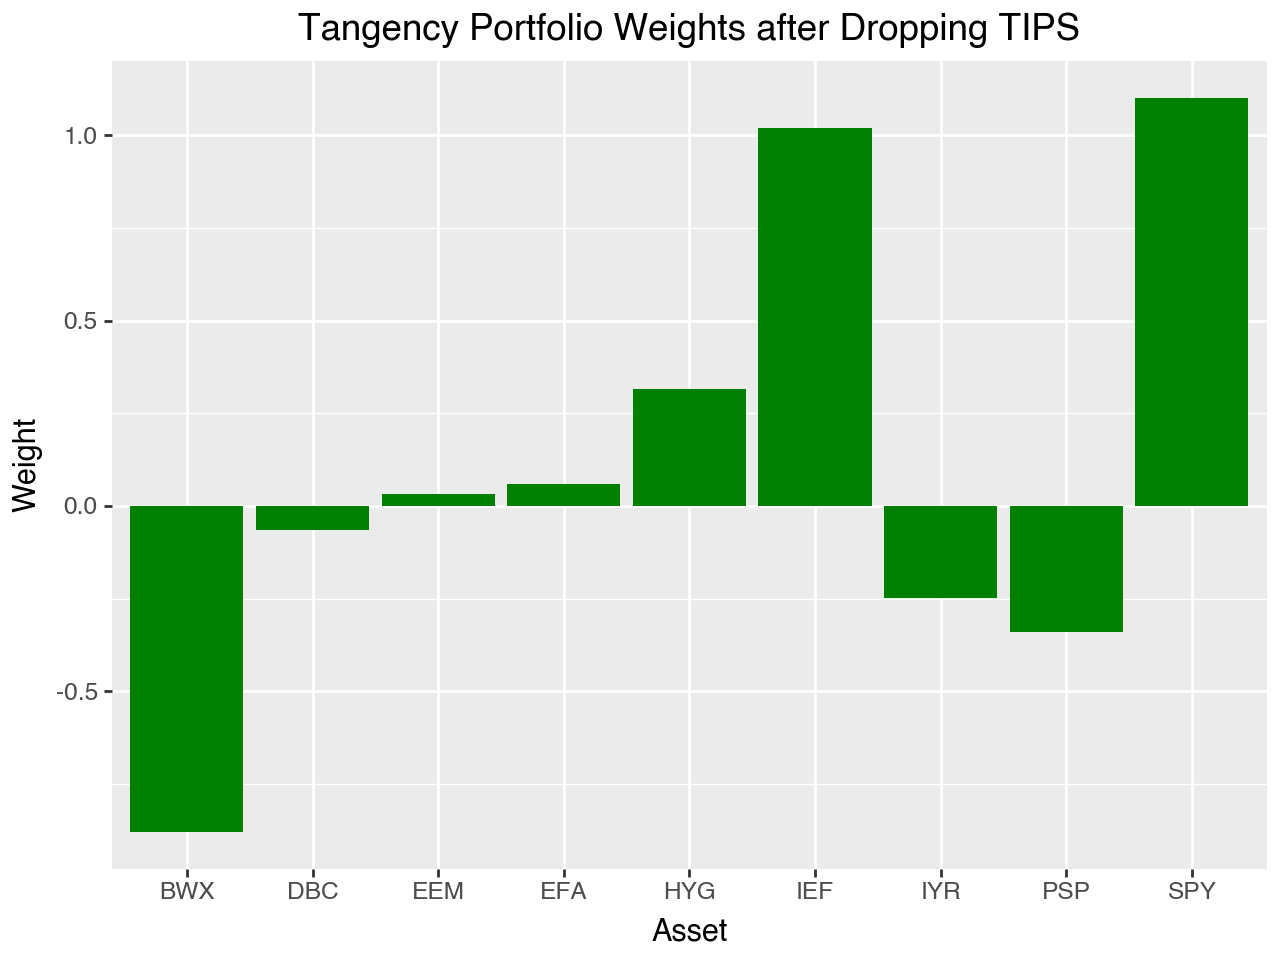

In [46]:
#Drop TIPS from investment set

excess_returns_minus_tips = excess_returns_df.drop(columns=["TIP"])
mean_m_minus_tips = excess_returns_minus_tips.mean()
vol_m_minus_tips = excess_returns_minus_tips.std(ddof=1)
cov_matrix_minus_tips = excess_returns_minus_tips.cov()
cov_vals_minus_tips = cov_matrix_minus_tips.values
mean_vals_minus_tips = mean_m_minus_tips.values

w_unnormalized_minus_tips = np.linalg.inv(cov_vals_minus_tips) @ mean_vals_minus_tips
w_tan_minus_tips = w_unnormalized_minus_tips / np.sum(w_unnormalized_minus_tips)

w_tan_minus_tips_df = pd.DataFrame({
    "Tangency Portfolio Weights After Dropping TIPS": w_tan_minus_tips
}, index=excess_returns_minus_tips.columns)
print(w_tan_minus_tips_df)

ggplot(w_tan_minus_tips_df, aes(x=w_tan_minus_tips_df.index, y="Tangency Portfolio Weights After Dropping TIPS")) + \
    geom_bar(stat="identity", fill = "green") + \
    labs(title="Tangency Portfolio Weights after Dropping TIPS", x="Asset", y="Weight")

In [47]:
#Performance of Tangency Portfolio after dropping TIPS

#Mean, volatility, and Sharpe ratio for Tangency Portfolio Weights
mean_tan_minus_tips = w_tan_minus_tips @ mean_vals_minus_tips
vol_tan_minus_tips = np.sqrt(w_tan_minus_tips @ cov_matrix_minus_tips @ w_tan_minus_tips)
sharpe_tan_minus_tips = (mean_tan_minus_tips / vol_tan_minus_tips)
print("Performance of Tangency Portfolio after Dropping TIPS:")
print("Annualized Mean:", (mean_tan_minus_tips * 12).round(4))
print("Annualized Vol:", (vol_tan_minus_tips * np.sqrt(12)).round(4))
print("Annualized Sharpe:", (sharpe_tan_minus_tips * np.sqrt(12)).round(4))

Performance of Tangency Portfolio after Dropping TIPS:
Annualized Mean: 0.1327
Annualized Vol: 0.0905
Annualized Sharpe: 1.4675


     Tangency Portfolio Weights After Adjusting TIP Return
BWX                                          -0.669693    
DBC                                          -0.121397    
EEM                                          -0.011815    
EFA                                           0.122554    
HYG                                           0.128372    
IEF                                           0.004667    
IYR                                          -0.241132    
PSP                                          -0.292555    
SPY                                           0.798513    
TIP                                           1.282487    


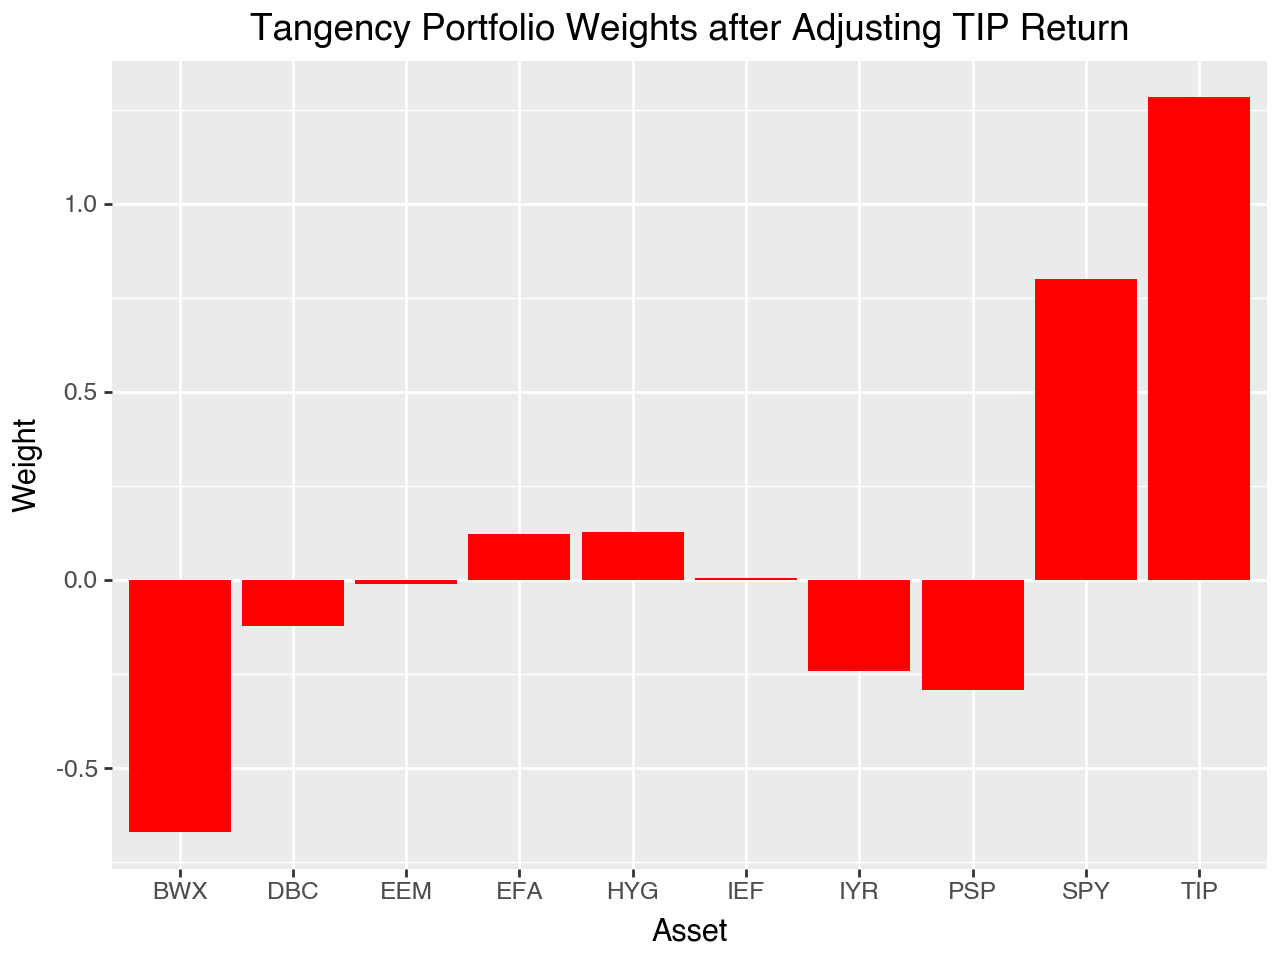

In [48]:
#Set expected excess return to TIPS is adjusted to be 0.0012 higher 
#   than what the historic sample shows

excess_returns_copy = excess_returns_df.copy()
excess_returns_copy["TIP"] = excess_returns_copy["TIP"] + 0.0012
mean_m_adj = excess_returns_copy.mean()
vol_m_adj = excess_returns_copy.std(ddof=1)
sharpe_m_adj = (mean_m_adj / vol_m_adj)

mean_m_adj_values = mean_m_adj.values
cov_matrix_adj = excess_returns_copy.cov()
cov_vals_adj = cov_matrix_adj.values

w_unnormalized_adj = np.linalg.inv(cov_vals_adj) @ mean_m_adj_values
w_tan_adj = w_unnormalized_adj / np.sum(w_unnormalized_adj)

w_tan_adj_df = pd.DataFrame({
    "Tangency Portfolio Weights After Adjusting TIP Return": w_tan_adj
}, index=excess_returns_copy.columns)
print(w_tan_adj_df)

ggplot(w_tan_adj_df, aes(x=w_tan_adj_df.index, y="Tangency Portfolio Weights After Adjusting TIP Return")) + \
    geom_bar(stat="identity", fill = "red") + \
    labs(title="Tangency Portfolio Weights after Adjusting TIP Return", x="Asset", y="Weight")

In [49]:
#Performance of Tangency Portfolio after Adjusting TIPS

#Mean, volatility, and Sharpe ratio for Tangency Portfolio Weights
mean_m_adj_tips = w_tan_adj @ mean_m_adj_values
vol_tan_adj_tips = np.sqrt(w_tan_adj @ cov_matrix_adj @ w_tan_adj)
sharpe_tan_adj_tips = (mean_m_adj_tips / vol_tan_adj_tips)
print("Performance of Tangency Portfolio after Adjusting TIPS:")
print("Annualized Mean:", (mean_m_adj_tips * 12).round(4))
print("Annualized Vol:", (vol_tan_adj_tips * np.sqrt(12)).round(4))
print("Annualized Sharpe:", (sharpe_tan_adj_tips * np.sqrt(12)).round(4))

Performance of Tangency Portfolio after Adjusting TIPS:
Annualized Mean: 0.1204
Annualized Vol: 0.0746
Annualized Sharpe: 1.6124


In [50]:
#Tangency Portfolio Weights Before & After Adjusting TIP Returns + Removing Tips

w_tan_minus_tips_df['TIP'] = None

comp_df = pd.DataFrame({
    "Before Adjusting TIP Return": w_tan,
    "After Adjusting TIP Return": w_tan_adj,
    "After Removing TIP": w_tan_minus_tips_df["Tangency Portfolio Weights After Dropping TIPS"]
}, index=excess_returns_df.columns)
print("Portfolio Weights Comparison:")
print(comp_df)


Portfolio Weights Comparison:
     Before Adjusting TIP Return  After Adjusting TIP Return  \
BWX                    -0.850643                   -0.669693   
DBC                    -0.071623                   -0.121397   
EEM                     0.026437                   -0.011815   
EFA                     0.068682                    0.122554   
HYG                     0.290614                    0.128372   
IEF                     0.881186                    0.004667   
IYR                    -0.246582                   -0.241132   
PSP                    -0.332995                   -0.292555   
SPY                     1.059632                    0.798513   
TIP                     0.175293                    1.282487   

     After Removing TIP  
BWX           -0.879292  
DBC           -0.063742  
EEM            0.032493  
EFA            0.060153  
HYG            0.316300  
IEF            1.019957  
IYR           -0.247445  
PSP           -0.339398  
SPY            1.100973  
TIP  

####
Assessment of Change:
    When we dropped tips, the annnualized mean, volatility, and Sharpe ratio increased, but not by large amounts. On the other hand, when we adjusted TIPS, the annualized mean was not changed much, the annualzied volatility decreased almost by 50%, and the annyalized Sharpe ratio doubled, which was notable.
    

####
Based on this analysis, TIPS do in fact seem to expand the investment opportunity. First, this asset is not highly correlated with any of the other assets, as seen in the correlation matrix. Second, when we adjusted TIPS by 0.012, the Sharpe ratio approximately doubled, which is a sign that the risk-adjusted performance of our portfolio improved, providing another reason for including TIPS (in some capacity) in this portfolio. 